In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('aws_ec2_instance_metric_cpu_utilization_daily.csv')

In [3]:
data.head()

,instance_id,metric_name,namespace,average,maximum,minimum,sample_count,sum,unit,timestamp,partition,region,account_id,_ctx/connection_name
0,i-0e6cdcc7fbadc55b4,CPUUtilization,AWS/EC2,17.008121,51.066667,0.000000,14,238.113692,Percent,2023-08-05T11:00:00.000Z,aws,ap-south-1,8.952610e+11,aws_aw2413
1,i-0e7d299a682aa8c11,CPUUtilization,AWS/EC2,0.250000,0.250000,0.250000,1,0.250000,Percent,2023-06-21T11:00:00.000Z,aws,ap-south-1,8.952610e+11,aws_aw2413
2,i-0395f6b638adf2ba2,CPUUtilization,AWS/EC2,0.930270,11.750392,0.000222,27,25.117297,Percent,2022-12-21T11:00:00.000Z,aws,ap-south-1,8.952610e+11,aws_aw2413
3,i-0b17f02ce7ba1e8d6,CPUUtilization,AWS/EC2,0.672056,3.274891,0.575010,116,77.958505,Percent,2022-12-28T11:00:00.000Z,aws,ap-south-1,8.952610e+11,aws_aw2413
4,i-0b17f02ce7ba1e8d6,CPUUtilization,AWS/EC2,0.639504,11.825197,0.000095,1206,771.241575,Percent,2022-12-27T11:00:00.000Z,aws,ap-south-1,8.952610e+11,aws_aw2413


In [4]:
data.describe()

,average,maximum,minimum,sample_count,sum,account_id
count,141.000000,141.000000,141.000000,141.000000,141.000000,1.410000e+02
mean,25.455893,46.638370,13.981685,1139.574468,35091.654215,8.952610e+11
std,34.833972,42.810996,22.887023,539.837121,49761.923269,0.000000e+00
min,0.063540,0.125000,0.000000,1.000000,0.250000,8.952610e+11
25%,0.329536,4.208333,0.000222,1090.000000,162.216667,8.952610e+11
50%,0.640117,24.528742,0.161290,1440.000000,503.206199,8.952610e+11
75%,55.225098,100.000000,44.508197,1440.000000,79352.023290,8.952610e+11
max,99.564442,100.000000,98.196721,1440.000000,139443.139700,8.952610e+11


In [5]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

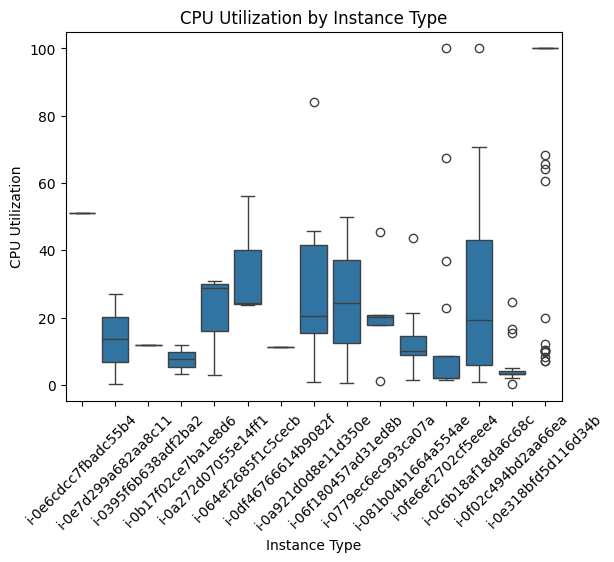

In [6]:
sns.boxplot(x='instance_id', y='maximum', data=data)
plt.title('CPU Utilization by Instance Type')
plt.xlabel('Instance Type')
plt.ylabel('CPU Utilization')
plt.xticks(rotation=45)
plt.show()

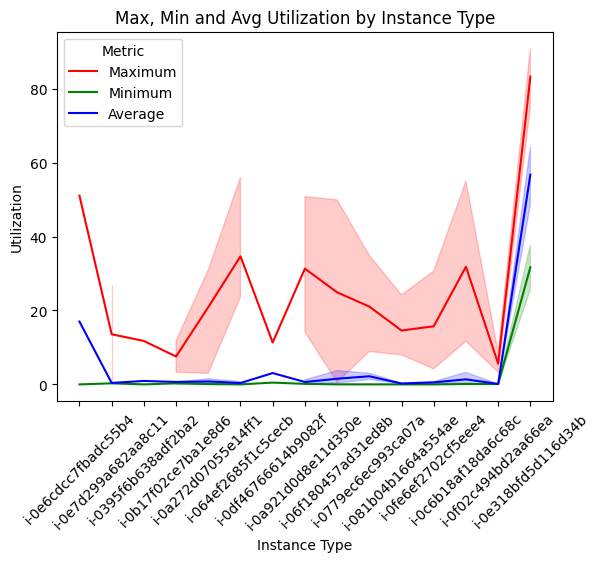

In [7]:
sns.lineplot(x='instance_id', y='maximum', data=data, label='Maximum', markers=True, color='red')
sns.lineplot(x='instance_id', y='minimum', data=data, label='Minimum', markers=True, color='green')
sns.lineplot(x='instance_id', y='average', data=data, label='Average', markers=True, color='blue')
plt.title('Max, Min and Avg Utilization by Instance Type')
plt.xlabel('Instance Type')
plt.ylabel('Utilization')
plt.xticks(rotation=45)
plt.legend(title='Metric')

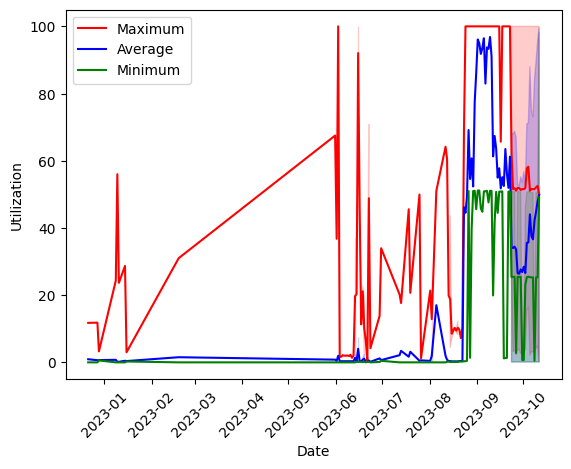

In [8]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
sns.lineplot(x='timestamp', y='maximum', data=data, label='Maximum', markers=True, color='red')
sns.lineplot(x='timestamp', y='average', data=data, label='Average', markers=True, color='blue')
sns.lineplot(x='timestamp', y='minimum', data=data, label='Minimum', markers=True, color='green')
plt.xlabel('Date')
plt.ylabel('Utilization')
plt.xticks(rotation=45)
plt.show()